In [1]:
# Read csv file
import pandas as pd
data = pd.read_csv("Data_Analyst_(ML)_Dataset_updated.csv")

# Test
data.head(n=10)

,id,amount,amount_label,vendor,vendor_score,vendor_label,invoice_number,invoice_number_label,bill_date,bill_date_label
0,52852834,581.70,581.70,NaN,NaN,Customer 7,2018-2,2018-2 Customer 7,22.08.2018,2018-08-22 00:00:00
1,51549425,NaN,152.55,camscanner,0.636422,Pickering Auto Lab,NaN,NaN,08/03/2018,2018-08-03 00:00:00
2,50906354,193.78,193.78,orientaltrading,0.695752,Oriental Trading,691318300,NaN,07/26/18,2018-07-26 00:00:00
3,51799181,7.00,7.00,bwc.ohio.gov,0.577856,bwc,NaN,NaN,08/06/2018,2018-08-06 00:00:00
4,51836250,16.33,12.02,cheritzplus,0.850405,Cheritzplus,2410-3575-2814-4714,2410-3575-2814-4714,NaN,2017-08-11 00:00:00
5,52381165,-1689.50,1689.50,trademarks,0.921771,TradeMarks,261569,261569,"wed, aug 22, 2018",2018-08-22 00:00:00
6,50318537,49.59,49.59,chouchou foods,0.991448,Chouchou foods,0454,0454,"march 28, 2018",2018-03-28 00:00:00
7,52533493,108.36,108.36,priori specialty food,0.760487,Priori Specialty Food,52832,52832,26 aug 2018,2018-08-26 00:00:00
8,51192904,500.00,500.00,performance lifestyle,0.965157,Julia McRae,7770,NaN,08/03/2018,2018-08-03 00:00:00
9,51154264,265.56,265.56,hygrade laser profiling,0.982403,Hygrade Laser Profiling,91970,91970,08/22/2018,2018-08-22 00:00:00


In [2]:
# invoice_number is optional, but others are mandatory fields

In [2]:
# number of rows
datalen = len(data.index)
# print(datalen)

In [5]:
# Q1. Find the accuracies of the amount, bill_date, vendor, and invoice_number predictions
'''
For all answers in Q1, I assume:
    The accuracy = the number of paired data / the number of rows

    NOT
    Let s_i be the similarity of each paired data where s_i is in [0, 1], and i is the index of each row.
    The accaracy = the sum of s_i / the number of rows

Since methods to calculate similarities could differ, such as:
    Hamming Distance (Same Length), Damerau–Levenshtein distance (Complicated), etc. (All in library of jellyfish)
'''

In [24]:
# Accuracy of amount

In [3]:
equal_num_amount = 0 # Used to store the number of paired amounts

def amount_match(i):
    tmp_hvv = data.at[i, 'amount_label'] # Used to store the human validated values
    tmp_mp = data.at[i, 'amount'] # Used to store the amount prediction by models
    if pd.notna(tmp_hvv) and pd.notna(tmp_mp):
        if tmp_hvv == tmp_mp:
            return True
        else:
            return False
    else:
        return False

for i in range(0, datalen):
    if amount_match(i):
        equal_num_amount += 1

print(equal_num_amount)

12783


In [4]:
result_amount = equal_num_amount / datalen
print("The Accuracy of the amount prediction is {}.".format(result_amount))

The Accuracy of the amount prediction is 0.8619689817936615.


In [8]:
# Accuracy of bill_date

In [8]:
# Method 1: It logically works, but is too complicated.
'''
Assumption: if date and month are both represented in numbers and the date is smaller/equal to 12,
              it can be regarded as MM/DD/YY or DD/MM/YY.
'''
# The idea is trying to find patterns of prediction and match them to the human validated values
# Disadvantages: 1. It loses data if not all patterns are involved in the helper function 1.
#                2. I considered "dayfirst" and "monthfirst", but not "yearfirst" in the helper function 2.
'''
from datetime import datetime

CASE_NUM = 19 # the number of cases/patterns
MONTH_NUM = 12 # total number of months

# Helper function 2
def try_to_match(dt1_dt, dt2_dt, i):
    if dt1_dt == dt2_dt:
        return 2
    elif i == 1:
        tmp_year = dt1_dt.timetuple().tm_year
        tmp_mday = dt1_dt.timetuple().tm_mon
        tmp_mon = dt1_dt.timetuple().tm_mday
        tmpstring = str(tmp_year) + ' ' + str(tmp_mon) + ' ' + str(tmp_mday)
        tmp_dt = datetime.strptime(tmpstring, '%Y %m %d')
        if tmp_dt == dt2_dt:
            return 2
        else:
            return 1
    else:
        return 1

# Helper function 1
def try_to_find(dt1, dt2_dt, i):
    index = 0
    # 1 means MM/DD/YY CAN switch to DD/MM/YY
    # 0 means CANNOT
    if i == 1:
        try:
            dt1_dt = datetime.strptime(dt1, '%d.%m.%Y')
            if dt1_dt.timetuple().tm_mday <= MONTH_NUM:
                index = 1
            return try_to_match(dt1_dt, dt2_dt, index)
        except ValueError:
            return 0
    elif i == 2:
        try:
            dt1_dt = datetime.strptime(dt1, '%m/%d/%Y')
            if dt1_dt.timetuple().tm_mday <= MONTH_NUM:
                index = 1
            return try_to_match(dt1_dt, dt2_dt, index)
        except ValueError:
            return 0
    elif i == 3:
        try:
            dt1_dt = datetime.strptime(dt1, '%m/%d/%y')
            if dt1_dt.timetuple().tm_mday <= MONTH_NUM:
                index = 1
            return try_to_match(dt1_dt, dt2_dt, index)
        except ValueError:
            return 0
    elif i == 4:
        try:
            dt1_dt = datetime.strptime(dt1, '%a, %b %d, %Y')
            return try_to_match(dt1_dt, dt2_dt, 0)
        except ValueError:
            return 0
    elif i == 5:
        try:
            dt1_dt = datetime.strptime(dt1, '%B %d, %Y')
            return try_to_match(dt1_dt, dt2_dt, 0)
        except ValueError:
            return 0
    elif i == 6:
        try:
            dt1_dt = datetime.strptime(dt1, '%d %b %Y')
            return try_to_match(dt1_dt, dt2_dt, 0)
        except ValueError:
            return 0
    elif i == 7:
        try:
            dt1_dt = datetime.strptime(dt1, '%d %B %Y')
            return try_to_match(dt1_dt, dt2_dt, 0)
        except ValueError:
            return 0
    elif i == 8:
        try:
            dt1_dt = datetime.strptime(dt1, '%A, %B %d, %Y')
            return try_to_match(dt1_dt, dt2_dt, 0)
        except ValueError:
            return 0
    elif i == 9:
        try:
            dt1_dt = datetime.strptime(dt1, '%d-%b-%Y')
            return try_to_match(dt1_dt, dt2_dt, 0)
        except ValueError:
            return 0
    elif i == 10:
        try:
            dt1_dt = datetime.strptime(dt1, '%Y/%m/%d')
            if dt1_dt.timetuple().tm_mday <= MONTH_NUM:
                index = 1
            return try_to_match(dt1_dt, dt2_dt, index)
        except ValueError:
            return 0
    elif i == 11:
        try:
            dt1_dt = datetime.strptime(dt1, '%d-%m-%Y')
            if dt1_dt.timetuple().tm_mday <= MONTH_NUM:
                index = 1
            return try_to_match(dt1_dt, dt2_dt, index)
        except ValueError:
            return 0
    elif i == 12:
        try:
            dt1_dt = datetime.strptime(dt1, '%B %d %Y')
            return try_to_match(dt1_dt, dt2_dt, 0)
        except ValueError:
            return 0
    elif i == 13:
        try:
            dt1_dt = datetime.strptime(dt1, '%m.%d-%y')
            if dt1_dt.timetuple().tm_mday <= MONTH_NUM:
                index = 1
            return try_to_match(dt1_dt, dt2_dt, index)
        except ValueError:
            return 0
    elif i == 14:
        try:
            dt1_dt = datetime.strptime(dt1, '%b-%d-%Y')
            return try_to_match(dt1_dt, dt2_dt, 0)
        except ValueError:
            return 0
    elif i == 15:
        try:
            dt1_dt = datetime.strptime(dt1, '%d%b%Y')
            return try_to_match(dt1_dt, dt2_dt, 0)
        except ValueError:
            return 0
    elif i == 16:
        try:
            dt1_dt = datetime.strptime(dt1, '%b. %d, %Y')
            return try_to_match(dt1_dt, dt2_dt, 0)
        except ValueError:
            return 0
    elif i == 17:
        try:
            dt1_dt = datetime.strptime(dt1, '%d%B, %Y')
            return try_to_match(dt1_dt, dt2_dt, 0)
        except ValueError:
            return 0
    elif i == 18:
        try:
            dt1_dt = datetime.strptime(dt1, '%b %d, %Y')
            return try_to_match(dt1_dt, dt2_dt, 0)
        except ValueError:
            return 0
    elif i == 19:
        try:
            dt1_dt = datetime.strptime(dt1, '%b %d %Y')
            return try_to_match(dt1_dt, dt2_dt, 0)
        except ValueError:
            return 0
    else:
        return 0

# Main
equal_num_bill_date = 0 # Used to store the number of paired bill_date
for i in range(0, datalen):
    tmp_hvv = data.at[i, 'bill_date_label'][:-9] # Used to store the human validated dates
    tmp_hvv_dt = datetime.strptime(tmp_hvv, '%Y-%m-%d')

    tmp_mp = data.at[i, 'bill_date'] # Used to store the bill_date prediction by models
    if pd.isna(tmp_mp):
        continue

    eval_num = 1 # Used to figure out the pattern of data
    while eval_num <= CASE_NUM: # Pattern Test
        if try_to_find(tmp_mp, tmp_hvv_dt, eval_num) == 2: # Pattern Found and Matched
            equal_num_bill_date += 1;
            break
        elif try_to_find(tmp_mp, tmp_hvv_dt, eval_num) == 1: # Pattern Found but NOT Matched
            break
        else: # Pattern NOT Found
            eval_num += 1
print(equal_num_bill_date)
'''

10481


In [5]:
# Method 2
'''
Assumption: For example, 12/11/10 could be regarded as 2012-Nov-10, 2010-Nov-12, or 2010-Dec-11.
'''
from dateutil import parser
from datetime import datetime

equal_num_bill_date = 0 # Used to store the number of paired bill_date

def bill_date_match(i):
    tmp_hvv = data.at[i, 'bill_date_label'][:-9] # Used to store the human validated values
    tmp_hvv_dt = datetime.strptime(tmp_hvv, '%Y-%m-%d')

    tmp_mp = data.at[i, 'bill_date'] # Used to store the bill_date prediction by models
    if pd.isna(tmp_mp):
        return False
    try:
        tmp_mp_dt = parser.parse(tmp_mp)
    except:
        try:
            tmp_mp_dt = parser.parse(tmp_mp, dayfirst = True)
        except:
            try:
                tmp_mp_dt = parser.parse(tmp_mp, yearfirst = True)
            except:
                return False
    if tmp_hvv_dt.timetuple().tm_year == tmp_mp_dt.timetuple().tm_year \
    and tmp_hvv_dt.timetuple().tm_mon == tmp_mp_dt.timetuple().tm_mon \
    and tmp_hvv_dt.timetuple().tm_mday == tmp_mp_dt.timetuple().tm_mday:
        return True
    else:
        return False

for i in range (0, datalen):
    if bill_date_match(i):
        equal_num_bill_date += 1

print(equal_num_bill_date)

12193


In [6]:
result_bill_date = equal_num_bill_date / datalen
print("The Accuracy of the bill_date prediction is {}.".format(result_bill_date))

The Accuracy of the bill_date prediction is 0.8221847606203642.


In [1]:
# Accuracy of vendor

In [7]:
equal_num_vendor = 0 # Used to store the number of paired vendor

def vendor_match(i):
    tmp_hvv = data.at[i, 'vendor'] # Used to store the human validated values    
    tmp_mp = data.at[i, 'vendor_label'] # Used to store the vendor prediction by models

    if pd.isna(tmp_hvv) or pd.isna(tmp_mp):
        return False

    # Ignore non-alpha or non-numeric letters in each string
    tmp_hvv = ''.join([char for char in tmp_hvv if char.isalpha() or char.isnumeric()])
    tmp_mp = ''.join([char for char in tmp_mp if char.isalpha() or char.isnumeric()])

    # Case Insensitive
    if tmp_hvv.lower() in tmp_mp.lower() or tmp_mp.lower() in tmp_hvv.lower():
        return True
    else:
        return False

for i in range (0, datalen):
    if vendor_match(i):
        equal_num_vendor += 1

print(equal_num_vendor)

11856


In [8]:
result_vendor = equal_num_vendor / datalen
print("The Accuracy of the vendor prediction is {}.".format(result_vendor))

The Accuracy of the vendor prediction is 0.7994605529332435.


In [23]:
# Accuracy of invoice_number

In [9]:
equal_num_invoice_number = 0 # Used to store the number of paired invoice_number

def invoice_number_match(i):
    tmp_hvv = data.at[i, 'invoice_number'] # Used to store the human validated values    
    tmp_mp = data.at[i, 'invoice_number_label'] # Used to store the invoice_number prediction by models
    
    if pd.isna(tmp_hvv) and pd.isna(tmp_mp):
        return True
    elif pd.isna(tmp_hvv) or pd.isna(tmp_mp):
        return False
    else:
        if tmp_hvv in tmp_mp or tmp_mp in tmp_hvv:
            return True
        else:
            return False

for i in range (0, datalen):
    if invoice_number_match(i):
        equal_num_invoice_number += 1

print(equal_num_invoice_number)

12191


In [10]:
result_invoice_number = equal_num_invoice_number / datalen
print("The Accuracy of the invoice_number prediction is {}.".format(result_invoice_number))

The Accuracy of the invoice_number prediction is 0.822049898853675.


In [11]:
print("In summary, the accuracies of the amount, bill_date, vendor, and invoice_number predictions \
are {}, {}, {}, {} respectively.".format(result_amount, result_bill_date, result_vendor, result_invoice_number))

In summary, the accuracies of the amount, bill_date, vendor, and invoice_number predictions are 0.8619689817936615, 0.8221847606203642, 0.7994605529332435, 0.822049898853675 respectively.


In [89]:
# Q2. Find the accuracy overall.
'''
According to the definition, for answers in Q2, I assume:
    The document is correct even if invoice_number doesn't match while others are all correct.
'''

"\nAccording to the definition, for answers in Q2, I assume:\n    The document is correct even if invoice_number doesn't match while others are all correct.\n"

In [12]:
equal_num_overall = 0 # Used to store the number of paired documents

for i in range (0, datalen):
    if amount_match(i) and bill_date_match(i) and vendor_match(i):
        equal_num_overall += 1
print(equal_num_overall)

8721


In [13]:
result_overall = equal_num_overall / datalen
print("In summary, the accuracy overall is {}.".format(result_overall))

In summary, the accuracy overall is 0.5880647336480108.


In [45]:
# Q3. Find the top three vendors with the most mistakes.
'''
Assumption: None of vendor_label is NaN.
'''

In [14]:
from collections import Counter

mistake_vendor = [] # Used to store the vendor whose prediction is incorrect

for i in range(0, datalen):
    if not vendor_match(i):
        mistake_vendor.append(data.at[i, 'vendor_label'])

print(Counter(mistake_vendor).most_common(3))

[('Paypal', 18), ('VincesMarket', 13), ('Emco Corporation', 12)]


In [15]:
print("The top three vendors with the most mistakes are Paypal, VincesMarket, and Emco Corporation.")

The top three vendors with the most mistakes are Paypal, VincesMarket, and Emco Corporation.


In [50]:
# Q4. Find the mean and standard deviation of the vendor_score.
'''
Assumption: None.
'''

In [16]:
import statistics as stat

data_score = data.loc[:, 'vendor_score'].dropna() # Ignore NaN in vendor_score
mean_vendor_score = stat.mean(data_score)
stdev_vendor_score = stat.stdev(data_score)

print("The mean of the vendor_score is {} and the standard deviation of it is {}." \
      .format(mean_vendor_score, stdev_vendor_score))
# Comment: Great Performance in vendor prediction

The mean of the vendor_score is 0.8933991399917546 and the standard deviation of it is 0.12210921807440456.


In [57]:
# Q5. Plot the distribution of vendor_scores.
'''
Assumption: Show the distribution on a histogram.
'''

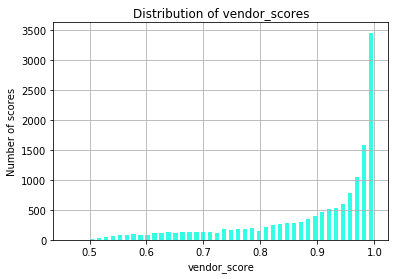

In [18]:
import matplotlib.pyplot as plt

plt.hist(x=data_score, bins='auto', color='#00FFDE', alpha=0.8, rwidth=0.6)
plt.title("Distribution of vendor_scores")
plt.xlabel("vendor_score")
plt.ylabel("Number of scores")
plt.grid(True)
plt.show()

In [79]:
# Q6. Identify top classes of vendor prediction errors and recommend fixes.
'''
Assumption: According to the histogram above, this model has great performance in most cases.
            However, there are still some NaN values involved in the dataset of scores.
            Hence it is important to figure out if vendors can be recognized by models.
'''

In [19]:
num_nan = 0 # Used to store the number of vendors whose scores are NaN

for i in range (0, datalen):
    if pd.isna(data.at[i, 'vendor_score']):
        print(data.at[i, 'vendor_label']) # Let's see which vendor cannot be predicted by models
        num_nan += 1

print("\nThe total number is: {}, {} of all vendors".format(num_nan, num_nan/datalen))

Customer 7
FMV
VincesMarket
Aircraft Spruce Canada
New York Bagel Cafe
MWC Practice Management
Bayswood Timber
PAYROLL
Westamerica Bank
henry schein
ASIC
Body Plus
Office Depot
TD Canada Trust
Oak Beverages Incorporated
Zuca
Mile IQ
Clear Estimates
doterra
Goodman
Usa Mobile Drug Testing
amazon.com
Emcoltd
NV Energy 7966
Positive Accounting Solutions
Pitchers Hospitality Supplies
Goodwill Industries of North Centre
David Christensen Consulting
discount propane
lenbeth weeping tile
CED Consolidated Electrical Distributors, Inc.
Juma Al Majid Est
Katherine Barreto
Sysco
White House Deli
City Pub AZ
EMCO Corporation
Amazon.ca
Rights at Home Canada
Shamrock Group, Inc
Pete's Auto body
Sherriff Electrical Pty Ltd
Parking
Office Depot OfficeMax
Global Rental Co Inc
FedEx
Seiva
City Of Medicine Hat Utilities
The Juice Truck
Mortgage Documents
Vern Lewis Welding Supply Inc
Monza Imports
Spire
Pyramid Plumbing Supply
comotion
City of St. Paul
Amazon
Customer 2
Onroute
National Bank
Scholtens Ca

In [ ]:
'''
There are totally 655 documents cannot be recognized. Some of them are big companies so I assume handwriting could be
a big problem during the OCR process, since everyone's handwriting font could differ. 

Recommendation:
In fact, scanned documents could be much easier to read, compared to ones uploaded as photos.
Light, Quality, and colors on photos are not necessary to recognize, but could affects the prediction.
It is suggested that changing normal pictures to texted ones should be executed during the OCR pre-processing, which
makes the document easier to read.
Moreover, even for a scanned document, lower DPI could also affect the quality of recognition.
As a result, if the quality of OCR is improved, the models could perform better in prediction.
'''